In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/data.csv")
data.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
6,0.956,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.1970,0,6O0puPuyrxPjDTHDUgsWI7,0.435,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.3050,1928
7,0.988,['Carl Woitschach'],0.555,153967,0.4210,0,6OJjveoYwJdIt76y0Pxpxw,0.836,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.8570,1928
8,0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.2070,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.4930,1928
9,0.846,['Seweryn Goszczyński'],0.674,111600,0.2050,0,6PrZexNb16cabXR8Q418Xc,0.000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.9540,81.249,0.7590,1928


In [3]:
data["artists"] = data["artists"].map(lambda x: x.replace("['", ""))
data["artists"] = data["artists"].map(lambda x: x.replace("']", ""))
data["artists"] = data["artists"].map(lambda x: x.replace("'", ""))

In [4]:
data["artists"]

0                            Carl Woitschach
1         Robert Schumann, Vladimir Horowitz
2                        Seweryn Goszczyński
3                           Francisco Canaro
4         Frédéric Chopin, Vladimir Horowitz
                         ...                
169904                      DripReport, Tyga
169905          Leon Bridges, Terrace Martin
169906                       Kygo, Oh Wonder
169907               Cash Cash, Andy Grammer
169908                        Ingrid Andress
Name: artists, Length: 169909, dtype: object

In [5]:
data.loc[(data["name"] == "Blank Space") & (data["artists"] == "Taylor Swift")]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87359,0.085,Taylor Swift,0.752,231827,0.678,0,1p80LdxRV74UKvL8gnD7ky,0.000002,5,0.1300,-5.421,1,Blank Space,71,2014-10-27,0.0646,96.009,0.583,2014
116046,0.103,Taylor Swift,0.760,231827,0.703,0,1kHEuJRasudLhjvnbfc4yS,0.000000,5,0.0913,-5.412,1,Blank Space,62,2014-10-27,0.0540,95.997,0.570,2014
116088,0.103,Taylor Swift,0.760,231827,0.703,0,2sC2P3BN0IXujNaaSyDmtP,0.000000,5,0.0913,-5.412,1,Blank Space,58,2014-10-27,0.0540,95.997,0.570,2014


In [6]:
data = data.drop_duplicates(subset=["name", "artists"], keep="first")

In [7]:
data.loc[(data["name"] == "Blank Space") & (data["artists"] == "Taylor Swift")]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87359,0.085,Taylor Swift,0.752,231827,0.678,0,1p80LdxRV74UKvL8gnD7ky,0.000002,5,0.13,-5.421,1,Blank Space,71,2014-10-27,0.0646,96.009,0.583,2014


In [8]:
data.drop(["id", "year", "release_date", "duration_ms"], axis=1, inplace=True)

In [9]:
data.head(15)

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence
0,0.995,Carl Woitschach,0.708,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767
2,0.604,Seweryn Goszczyński,0.749,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800
3,0.995,Francisco Canaro,0.781,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693
5,0.995,"Felix Mendelssohn, Vladimir Horowitz",0.424,0.1200,0,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,0.0593,63.521,0.2660
6,0.956,"Franz Liszt, Vladimir Horowitz",0.444,0.1970,0,0.435,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,0.0400,80.495,0.3050
7,0.988,Carl Woitschach,0.555,0.4210,0,0.836,1,0.1050,-9.878,1,Per aspera ad astra,0,0.0474,123.310,0.8570
8,0.995,"Francisco Canaro, Charlo",0.683,0.2070,0,0.206,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,0.1270,119.833,0.4930
9,0.846,Seweryn Goszczyński,0.674,0.2050,0,0.000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,0.9540,81.249,0.7590


In [10]:
data.shape

(156608, 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2b2d04670>]],
      dtype=object)

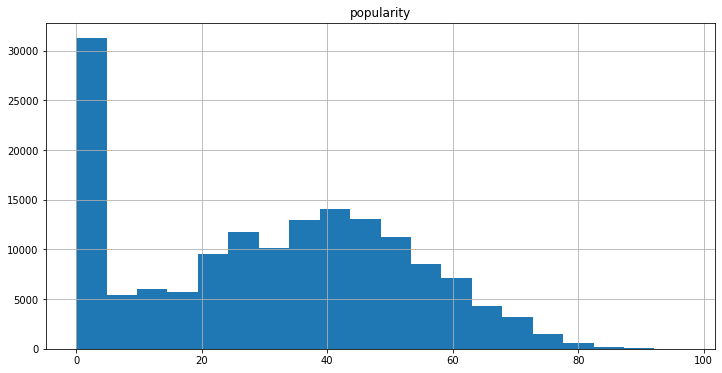

In [11]:
data.hist(column="popularity", figsize=(12, 6), bins=20)

In [12]:
data.drop(data[data["popularity"] < 20].index, axis=0, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2af86aa30>]],
      dtype=object)

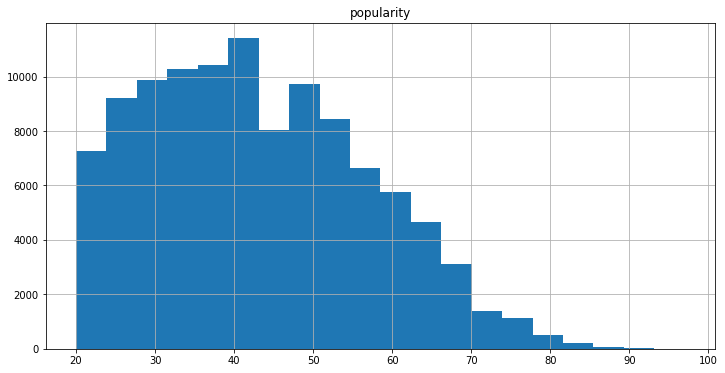

In [13]:
data.hist(column="popularity", figsize=(12, 6), bins=20)

In [14]:
data.sort_values(by="popularity", axis=0, ascending=False, inplace=True)
data.head(10)

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence
87949,0.7310,"Powfu, beabadoobee",0.726,0.431,0,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,0.1350,144.026,0.348
87941,0.2330,"THE SCOTTS, Travis Scott, Kid Cudi",0.716,0.537,1,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,0.0514,129.979,0.280
87840,0.1040,Roddy Ricch,0.896,0.586,1,0.000000,10,0.7900,-6.687,0,The Box,95,0.0559,116.971,0.642
87852,0.0686,"Surf Mesa, Emilee",0.674,0.774,0,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,0.0892,112.050,0.330
87844,0.3050,"BENEE, Gus Dapperton",0.863,0.631,1,0.000030,7,0.1230,-4.689,1,Supalonely,95,0.0534,128.977,0.817
87952,0.0210,"Lady Gaga, Ariana Grande",0.672,0.855,0,0.000000,9,0.3230,-3.764,1,Rain On Me (with Ariana Grande),94,0.0397,123.056,0.646
87953,0.2230,"Ariana Grande, Justin Bieber",0.597,0.450,0,0.000000,8,0.3820,-6.658,1,Stuck with U (with Justin Bieber),94,0.0418,178.765,0.537
87858,0.6920,Tones And I,0.824,0.588,0,0.000104,6,0.1490,-6.400,0,Dance Monkey,94,0.0924,98.027,0.513
87951,0.0264,6ix9ine,0.611,0.688,1,0.000000,1,0.2510,-5.688,1,GOOBA,94,0.3410,178.462,0.393
87943,0.7490,StaySolidRocky,0.728,0.431,0,0.000000,6,0.0996,-9.966,0,Party Girl,94,0.0622,130.022,0.629


In [15]:
data.shape

(108243, 15)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108243 entries, 87949 to 1758
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      108243 non-null  float64
 1   artists           108243 non-null  object 
 2   danceability      108243 non-null  float64
 3   energy            108243 non-null  float64
 4   explicit          108243 non-null  int64  
 5   instrumentalness  108243 non-null  float64
 6   key               108243 non-null  int64  
 7   liveness          108243 non-null  float64
 8   loudness          108243 non-null  float64
 9   mode              108243 non-null  int64  
 10  name              108243 non-null  object 
 11  popularity        108243 non-null  int64  
 12  speechiness       108243 non-null  float64
 13  tempo             108243 non-null  float64
 14  valence           108243 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 13.2+ MB


In [17]:
comma_counter = 0
for i in range(len(data)):
    string = data.iloc[i, 1]
    res = Counter(data.iloc[i, 1])
    commas = res[',']
    if(commas > comma_counter):
        comma_counter = res[',']
        
print(comma_counter)

39


In [18]:
for i in range(len(data)):
    res = Counter(data.iloc[i, 1])
    if res[','] == 39:
        print(data.iloc[i, :])

acousticness                                                    0.641
artists             Ricky Martin, Alejandro Sanz, Thalía, Juan Lui...
danceability                                                    0.276
energy                                                          0.572
explicit                                                            0
instrumentalness                                                    0
key                                                                 1
liveness                                                          0.2
loudness                                                       -7.818
mode                                                                1
name                        El Ultimo Adiós - Varios Artistas Version
popularity                                                         68
speechiness                                                    0.0377
tempo                                                          77.986
valence             

In [19]:
data["artists"] = data["artists"].map(lambda x: x.split(', ')[:2])

In [20]:
data.head(20)

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence
87949,0.73100,"[Powfu, beabadoobee]",0.726,0.431,0,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,0.1350,144.026,0.348
87941,0.23300,"[THE SCOTTS, Travis Scott]",0.716,0.537,1,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,0.0514,129.979,0.280
87840,0.10400,[Roddy Ricch],0.896,0.586,1,0.000000,10,0.7900,-6.687,0,The Box,95,0.0559,116.971,0.642
87852,0.06860,"[Surf Mesa, Emilee]",0.674,0.774,0,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,0.0892,112.050,0.330
87844,0.30500,"[BENEE, Gus Dapperton]",0.863,0.631,1,0.000030,7,0.1230,-4.689,1,Supalonely,95,0.0534,128.977,0.817
87952,0.02100,"[Lady Gaga, Ariana Grande]",0.672,0.855,0,0.000000,9,0.3230,-3.764,1,Rain On Me (with Ariana Grande),94,0.0397,123.056,0.646
87953,0.22300,"[Ariana Grande, Justin Bieber]",0.597,0.450,0,0.000000,8,0.3820,-6.658,1,Stuck with U (with Justin Bieber),94,0.0418,178.765,0.537
87858,0.69200,[Tones And I],0.824,0.588,0,0.000104,6,0.1490,-6.400,0,Dance Monkey,94,0.0924,98.027,0.513
87951,0.02640,[6ix9ine],0.611,0.688,1,0.000000,1,0.2510,-5.688,1,GOOBA,94,0.3410,178.462,0.393
87943,0.74900,[StaySolidRocky],0.728,0.431,0,0.000000,6,0.0996,-9.966,0,Party Girl,94,0.0622,130.022,0.629


In [23]:
data.iloc[0, 1][1]

'beabadoobee'

In [35]:
mask = data["name"].str.contains("just like this", case=False)
data[mask]

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence
87708,0.04980,"[The Chainsmokers, Coldplay]",0.617,0.635,0,0.000014,11,0.1640,-6.769,0,Something Just Like This,83,0.0317,103.019,0.446
142194,0.00896,[Limp Bizkit],0.639,0.947,0,0.001730,6,0.0915,-4.216,1,Just Like This,51,0.1420,100.869,0.586
130880,0.66800,[Joni Mitchell],0.656,0.373,0,0.000000,0,0.1990,-12.850,1,Just Like This Train,34,0.0260,102.888,0.520


In [38]:
data.to_csv("cleaned/song_data.csv", index=False)